<a href="https://colab.research.google.com/github/lianatasha/MLpython/blob/main/Examen2Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exámen práctico.
**Machine** **Learning**


**3er** **Semestre** **MOCA**



Alumna:


Lia Natasha Pacheco Sánchez

**1) Lee la base de datos**

In [1]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lianatasha/MLpython/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**2) Crea una etapa de preprocesamiento donde : se traten valores vacíos NAN, se imputen valores, se eliminen renglones o columnas (justifica los procedimientos).**

Se verifica si se tienen valores vacios NaN:

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Como vemos no existen valores perdidos en la base de datos 

Se buscan las principales columnas que interesa saber si existen datos con 0, ya que con la información anterior podemos ver que no existen datos nulos

In [5]:
(df.Glucose == 0).sum(),(df.BloodPressure== 0).sum(),(df.SkinThickness== 0).sum(),(df.Insulin== 0).sum(),(df.BMI== 0 ).sum(),(df.DiabetesPedigreeFunction== 0).sum(),(df.Age== 0).sum()

(5, 35, 227, 374, 11, 0, 0)

Se encuentran  muchos 0 principalmente en columnas como SkinThickness e Insulin. 

Se eliminan las filas de los 0 encontrados en columnas que contengan menos de 100 valores 0, es decir, de la columna Glucose, BloodPressure y BMI

In [6]:
db=df[df['Glucose']==0]
df=df.drop(db.index)
db=df[df['BloodPressure']==0]
df=df.drop(db.index)
db=df[df['BMI']==0]
df=df.drop(db.index)

datf= df
datf.reset_index(drop = True )


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
719,10,101,76,48,180,32.9,0.171,63,0
720,2,122,70,27,0,36.8,0.340,27,0
721,5,121,72,23,112,26.2,0.245,30,0
722,1,126,60,0,0,30.1,0.349,47,1


In [7]:
datf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
(datf.Glucose == 0).sum(),(datf.BloodPressure== 0).sum(),(datf.SkinThickness== 0).sum(),(datf.Insulin== 0).sum(),(datf.BMI== 0 ).sum(),(datf.DiabetesPedigreeFunction== 0).sum(),(datf.Age== 0).sum()

(0, 0, 192, 332, 0, 0, 0)

Se confirma que se eliminan dichos valores y ahora los 192 y 332 restantes serán reemplazados por valores NaN para después transformarlos a valor mean:

Antes de reemplazarlos se hace un nuevo conjunto de datos tomando las columnas significativas

In [9]:
newData=datf[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','Age', 'Outcome']].to_numpy()
newData

array([[148. ,  72. ,  35. , ...,  33.6,  50. ,   1. ],
       [ 85. ,  66. ,  29. , ...,  26.6,  31. ,   0. ],
       [183. ,  64. ,   0. , ...,  23.3,  32. ,   1. ],
       ...,
       [121. ,  72. ,  23. , ...,  26.2,  30. ,   0. ],
       [126. ,  60. ,   0. , ...,  30.1,  47. ,   1. ],
       [ 93. ,  70. ,  31. , ...,  30.4,  23. ,   0. ]])

In [10]:
X=newData
X = datf.drop("Outcome", axis=1)
Y=np.hstack((newData[:,[6]]))

In [11]:
X['SkinThickness'] = X['SkinThickness'].replace([0], [np.nan])
X['Insulin'] = X['Insulin'].replace([0], [np.nan])

In [12]:
X.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Se confirma que ahora los valores 0 son NaN

In [13]:
imp = SimpleImputer(strategy='mean')
X['SkinThickness'] = imp.fit_transform(X['SkinThickness'].values.reshape(-1, 1) )
X['Insulin'] = imp.fit_transform(X['Insulin'].values.reshape(-1, 1) )


Se transformaron a Valor Mean y se confirma que dejan de ser NaN:

In [14]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [15]:
(X.Glucose == 0).sum(),(X.BloodPressure== 0).sum(),(X.SkinThickness== 0).sum(),(X.Insulin== 0).sum(),(X.BMI== 0 ).sum(),(X.DiabetesPedigreeFunction== 0).sum(),(X.Age== 0).sum()

(0, 0, 0, 0, 0, 0, 0)

Se confirma que ya no existen valores NaN ni valores con 0

**3) Visualiza la base de datos**

In [16]:
df['Outcome'] = Y.tolist()

Text(0.5, 1.0, 'Grafica de conteo para Outcome')

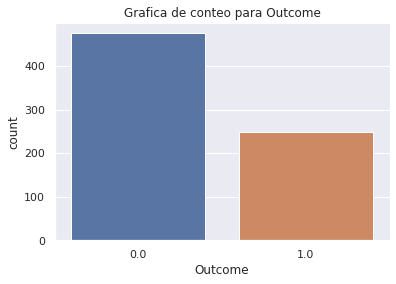

In [17]:
sns.countplot(x=df.Outcome)
plt.title("Grafica de conteo para Outcome")

Cuantas personas sin Diabetes tenemos en Azul y con Diabetes en Rojo

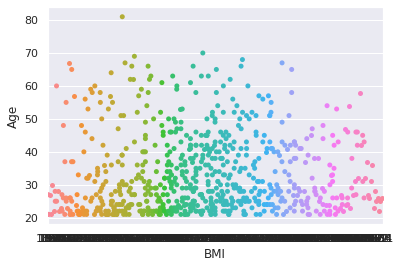

In [18]:
sns.stripplot(x="BMI", y="Age", data=X)

Se visualiza que hay datos concentrados entre la media de BMI y con edades entre 20-40.


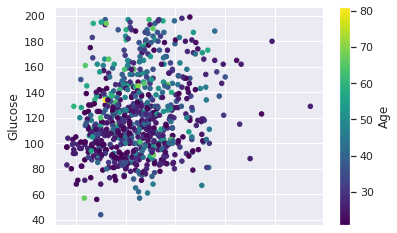

In [19]:
X.plot.scatter(x='BMI', y='Glucose', c='Age', colormap='viridis')

A mayor claridad de color es una edad avanzada, se puede notar que a glucosa mas alta y BMI medios existe una concentración de personas de edad avanzada, hace sentido.

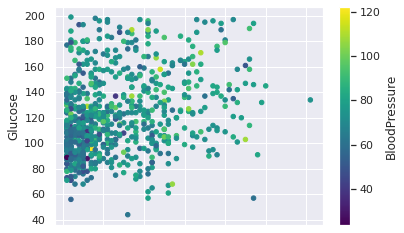

In [20]:
X.plot.scatter(x='Age', y='Glucose', c='BloodPressure', colormap='viridis')

A mayor presion arterial podemos ver mayor claridad de color, y a mayor edad se nota una concentración de mayor edad, al igual que para una glucosa mas alta.

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

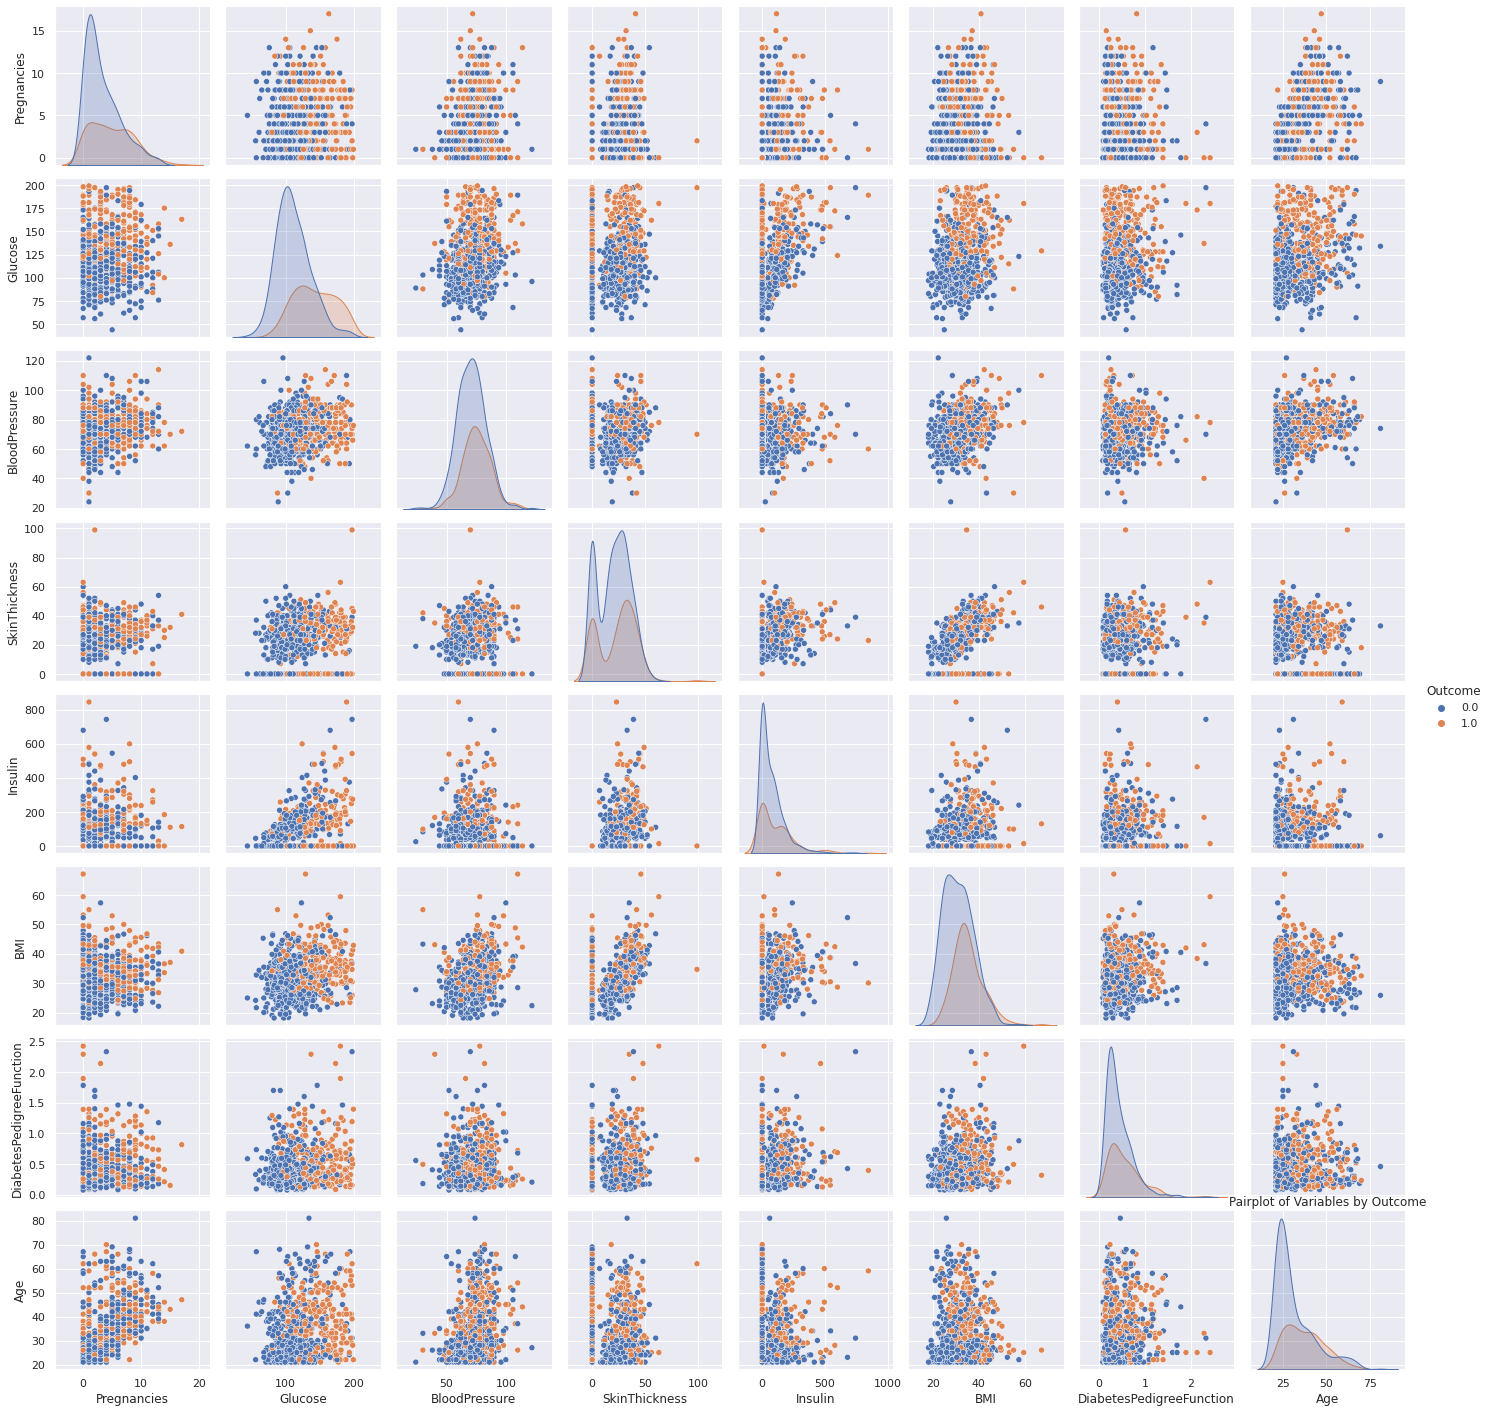

In [21]:
import seaborn as sns
sns.pairplot(datf, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

Todas las tablas relacionadas por pares de columnas entres sí, dividiendo las salidas de quienes tienen y no diabetes.


In [22]:
cor = X.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.134915,0.209668,0.080257,0.055469,0.012342,-0.025996,0.557066
Glucose,0.134915,1.000000,0.223331,0.195760,0.428967,0.223276,0.136630,0.263560
BloodPressure,0.209668,0.223331,1.000000,0.192653,0.073125,0.287403,-0.000075,0.324897
SkinThickness,0.080257,0.195760,0.192653,1.000000,0.156235,0.554207,0.105412,0.126468
Insulin,0.055469,0.428967,0.073125,0.156235,1.000000,0.169843,0.103906,0.138411
BMI,0.012342,0.223276,0.287403,0.554207,0.169843,1.000000,0.154858,0.020835
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.105412,0.103906,0.154858,1.000000,0.023098
Age,0.557066,0.263560,0.324897,0.126468,0.138411,0.020835,0.023098,1.000000


La tabla muestra el índice de correlación existente entre ambas columnas, se descartan las columnas que contengan índices negativos, excepto BloodPressure ya que era bastante pequeño, por lo que se considera también una columna significativa.

**4) Realiza una selección de la características más significativas: esto se realizo previamente en el inciso 2**

**5) Construye modelos de machine learning considerando splits de los datos 60-40, 70-30, 80-20**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

**6) Entrena tus modelos considerando validación cruzada.**
 **7) Crea al menos 5 modelos de ML : regresión lineal, regresión lógistica, redes neuronales (perceptrón multicapa), svm, random forest y/o algún otro algoritmo de tu interes. En esta etapa identifica los hiper parámetros de cada algoritmo y realiza un análisis paramétrico buscando los valores óptimos para cada algoritmo.**

**(#1) Creando modelo de árboles de decisión:**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=2, 
                                    random_state=1)
tree_model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


Y_predict = tree_model.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Mean absolute error: ',metrics.mean_absolute_error(Y_test, Y_predict))

Accuracy: 0.729
Mean Squared Error: 0.2706422018348624
Mean absolute error:  0.2706422018348624


Nos arroja una precisión de 70% el Arboles de Decisión el utilizar una profundidad de más de 2, pero sube a un 72% utilizando solamente una profundidad de 2

In [26]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = tree_model
kfold_validacion = KFold(10) 

Se indica cuantos fold queremos para la validación cruzada, se eligieron 10

In [27]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.67123288 0.76712329 0.68493151 0.68493151 0.70833333 0.77777778
 0.79166667 0.83333333 0.73611111 0.70833333]


0.7363774733637747

 Se puede ver el promedio de los resultados al final. 

En promedio se observa una mejor en los 10 fold de un 0.1%

**(#2)Creando modelo Random Forest:**

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=15, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=2,
                       random_state=1)

In [29]:
Y_predict = forest.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Mean absolute error: ',metrics.mean_absolute_error(Y_test, Y_predict))

Accuracy: 0.752
Mean Squared Error: 0.24770642201834864
Mean absolute error:  0.24770642201834864


Utilizando 15 árboles de decisión y en 2 núcleos del ordenador se logra el mejor resultado con un 75% de accuracy 

In [30]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = forest
kfold_validacion = KFold(10)

In [31]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.65753425 0.78082192 0.69863014 0.67123288 0.79166667 0.81944444
 0.86111111 0.86111111 0.69444444 0.75      ]


0.758599695585997

Se puede ver el promedio de los resultados al final. 

En promedio se observa en los 10 fold que se mantiene igual al Accuracy

Realizaremos una estandarización de los datos para los siguientes modelos:

Se estandarizan los datos:

In [32]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**(#3)Construyendo Perceptron**

In [33]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
ppn.fit(X_train_std, Y_train)

Y_predict = ppn.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Mean Absolute error: ',metrics.mean_absolute_error(Y_test, Y_predict))

Accuracy: 0.665
Mean Squared Error: 0.3348623853211009
Mean Absolute error:  0.3348623853211009


Con un perceptrón obtenemos un Accuracy de 73%

In [36]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = ppn
kfold_validacion = KFold(10)

In [37]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.56164384 0.61643836 0.56164384 0.64383562 0.51388889 0.375
 0.80555556 0.70833333 0.69444444 0.59722222]


0.6078006088280061

**(#4)Construyendo SVM**

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.6, C=1.0)
svm.fit(X_train_std, Y_train)

SVC(gamma=0.6, random_state=1)

In [39]:
Y_predict = svm.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Mean absolute error: ',metrics.mean_absolute_error(Y_test, Y_predict))

Accuracy: 0.743
Mean Squared Error: 0.25688073394495414
Mean absolute error:  0.25688073394495414


Como resultado del SVM tenemos un 74% de Accuracy en uno de los mejores casos colocando gamma al 0.6

In [40]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = svm
kfold_validacion = KFold(10)

In [41]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.5890411  0.69863014 0.54794521 0.64383562 0.65277778 0.625
 0.80555556 0.72222222 0.68055556 0.59722222]


0.6562785388127853

En promedio se observa que no hay mejoria en los 10 fold, ya que ahora el promedio indica un 65% de accuracy 

**(#4)Construyendo KNN:**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, p=2,
                           metric='minkowski')
knn.fit(X_train_std, Y_train)

Y_predict = knn.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(Y_test,Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Mean absolute error: ',metrics.mean_absolute_error(Y_test, Y_predict))

Accuracy: 0.752
Mean Squared Error: 0.24770642201834864
Mean absolute error:  0.24770642201834864


Como resultado del KNN tenemos un 75% de Accuracy en uno de los mejores casos colocando un numero de 7 vecinos y la distancia euclidiana colocando p=2

In [43]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = knn
kfold_validacion = KFold(10)

In [44]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.67123288 0.79452055 0.67123288 0.60273973 0.79166667 0.75
 0.68055556 0.86111111 0.73611111 0.77777778]


0.7336948249619483

Como resultado final se obtiene un promedio de 73% tras un fold de 10

**8) Compara tus modelos considerando las métricas : Accuracy, MAE, y MSE.**

In [57]:
Image(url='https://github.com/lianatasha/MLpython/blob/821660e06abf68d0ed229f64761c8b08af4383ad/Ex2.JPG', width=200) 
